## Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

# import file

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


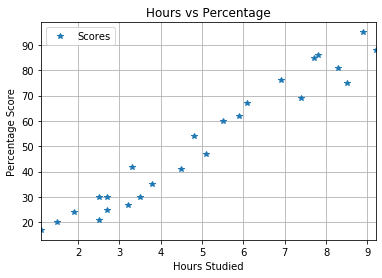

In [5]:
data.plot(x='Hours', y='Scores', style='*') 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

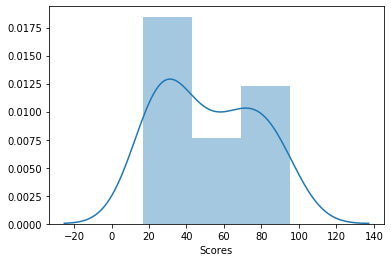

In [7]:
sns.distplot(data['Scores'])

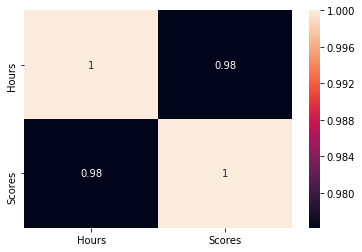

In [8]:
sns.heatmap(data.corr() , annot = True)

## Splitting data

In [9]:
from sklearn.model_selection import train_test_split  
train_set, test_set = train_test_split(data, test_size=0.2, random_state=0) 

In [10]:
Train_x = train_set.drop(['Scores'], axis = 1).copy()
Train_y = train_set['Scores'].copy()
Test_x = test_set.drop(['Scores'], axis = 1).copy()
Test_y = test_set['Scores'].copy()

## Model building

In [11]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression().fit(Train_x, Train_y) 

## Model Prediction

In [14]:
print(Test_x) # Testing data - In Hours
y_pred = model.predict(Test_x) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [15]:
df = pd.DataFrame({'Actual': Test_y, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


## Model Evaluation

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [17]:
from sklearn.metrics import mean_absolute_error
mn = mean_absolute_error(Test_y, y_pred)
print('Mean Absolute Error :', mn)

Mean Absolute Error : 4.183859899002975
